**Importing important libraries**



1.   **pandas,numpy**: For data handling and numerical operations.

2.   **matplotlib, seaborn**: For visualizations.

3.   **re**: For regular expressions, used in text cleaning.

4.   **nltk**: Natural Language Toolkit, used for stopwords in text cleaning.

5.   **wordcloud**: To visualize common words in text.

6.   **scikit-learn modules**: For text vectorization, model building, and evaluation.






In [1]:
# Import necessary libraries
import os
import pickle
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Set up for NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rawat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Mount Google Drive and Load CSV File**


1.   Mount Google Drive: Allows access to files in Google Drive.
2.   Load CSV: Loads the CSV data file from Google Drive into a pandas DataFrame.
3.   Display: Shows the first few rows of the dataset to understand its structure.




In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load CSV file from Folder
file_path = 'Dataset/Filtered_News_Stock_Price_Text_Dataset.csv'  # Update with file path
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


,Unnamed: 0,date,url,full_text,summary
0,0,2022-10-08,https://www.livemint.com/market/stock-market-n...,Have you read your account statements for the ...,And it’s natural to avoid looking too closely ...
1,1,2022-10-08,https://www.zawya.com/en/markets/equities/wall...,Wall Street fell sharply on Friday following a...,"Nonfarm payrolls rose by 263,000 jobs, more th..."
2,2,2022-10-08,https://www.goodisonnews.com/2022/10/08/stock-...,"By Matthew Shaw 8th Oct, 2022 | 8:10am\n\nStoc...","By Matthew Shaw 8th Oct, 2022 | 8:10amStock ma..."
3,3,2022-10-08,https://www.livemint.com/market/stock-market-n...,Stock split 2022: The board of directors of An...,Stock split 2022: The board of directors of An...
4,4,2022-10-08,https://finance.yahoo.com/news/crypto-exchange...,(Reuters) - Cryptocurrency exchange Huobi Glob...,(Reuters) - Cryptocurrency exchange Huobi Glob...


**Data Exploration**


*   **Data Info**: Shows data types and column information, helpful for identifying potential issues.
*   **Missing Values**: Counts missing values per column, essential for data cleaning.




In [4]:
# Check for missing values and data types
print("Dataset Info:")
df.info()
print("\nMissing values in each column:")
print(df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4699 entries, 0 to 4698
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4699 non-null   int64 
 1   date        4699 non-null   object
 2   url         4699 non-null   object
 3   full_text   4699 non-null   object
 4   summary     4699 non-null   object
dtypes: int64(1), object(4)
memory usage: 183.7+ KB

Missing values in each column:
Unnamed: 0    0
date          0
url           0
full_text     0
summary       0
dtype: int64


In [5]:
# Display the column names
print("Column names in the dataset:")
print(df.columns)


Column names in the dataset:
Index(['Unnamed: 0', 'date', 'url', 'full_text', 'summary'], dtype='object')


**Clean and Preprocess Text Data**


*   **clean_text function**: Removes special characters, converts text to lowercase, and removes stopwords.
*   **Apply cleaning**: Applies the clean_text function to the full_text column, creating a new cleaned_text column.






In [6]:
def clean_text(text):
    # Remove special characters, numbers, and lowercase the text
    text = re.sub(r"[^a-zA-Z\s]", "", str(text))
    text = text.lower()
    # Remove stopwords
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

# Apply text cleaning function to the 'full_text' column
df['cleaned_text'] = df['full_text'].apply(clean_text)
df.head()


,Unnamed: 0,date,url,full_text,summary,cleaned_text
0,0,2022-10-08,https://www.livemint.com/market/stock-market-n...,Have you read your account statements for the ...,And it’s natural to avoid looking too closely ...,read account statements justfinished third qua...
1,1,2022-10-08,https://www.zawya.com/en/markets/equities/wall...,Wall Street fell sharply on Friday following a...,"Nonfarm payrolls rose by 263,000 jobs, more th...",wall street fell sharply friday following soli...
2,2,2022-10-08,https://www.goodisonnews.com/2022/10/08/stock-...,"By Matthew Shaw 8th Oct, 2022 | 8:10am\n\nStoc...","By Matthew Shaw 8th Oct, 2022 | 8:10amStock ma...",matthew shaw th oct stock market volatile pote...
3,3,2022-10-08,https://www.livemint.com/market/stock-market-n...,Stock split 2022: The board of directors of An...,Stock split 2022: The board of directors of An...,stock split board directors anjani foods ltd a...
4,4,2022-10-08,https://finance.yahoo.com/news/crypto-exchange...,(Reuters) - Cryptocurrency exchange Huobi Glob...,(Reuters) - Cryptocurrency exchange Huobi Glob...,reuters cryptocurrency exchange huobi global s...


In [7]:
# Placeholder target column (example: random binary target)
np.random.seed(0)
df['target'] = np.random.choice(['up', 'down'], len(df))


**Target Distribution Bar Chart Visualization**

*  **Plot Target Distribution**: Visualizes the balance of the target variable (e.g., "up" vs. "down").
* **Insight**: Helps determine if there’s an imbalance in the classes, which could impact model performance.
  

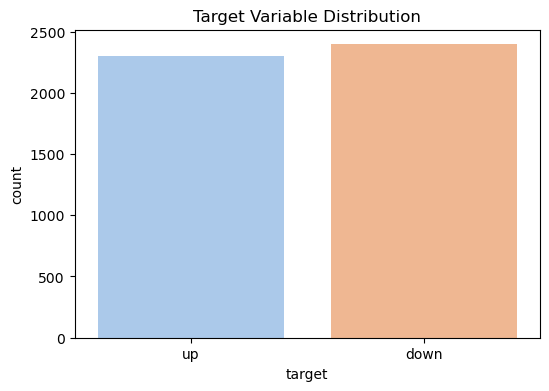

In [11]:
# Plot target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='target', palette= 'pastel')
plt.title("Target Variable Distribution")

# Save the plot as a transparent PNG with the title as the filename
plot_path = os.path.join("Plots", "Target_Variable_Distribution.png")
plt.savefig(plot_path, transparent=True, dpi=300)

plt.show()

**Target Distribution Pie Chart Visualization**

*  **Plot Target Distribution**: Visualizes the balance of the target variable (e.g., "up" vs. "down").
* **Insight**: Helps determine if there’s an imbalance in the classes, which could impact model performance.
  

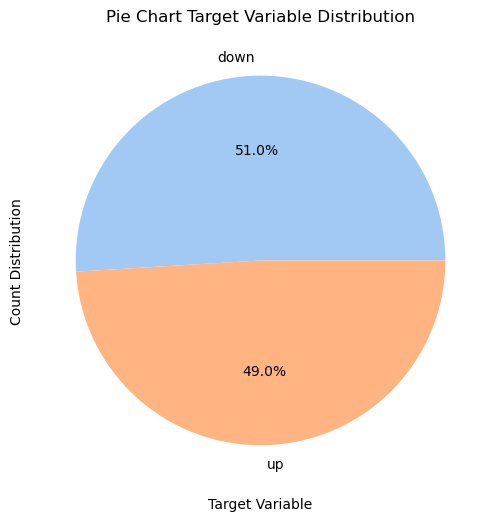

In [12]:
# Plot target variable distribution using matplotlib
plt.figure(figsize=(6, 6))  # Adjust figure size for better visibility
df['target'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))

# Add title, xlabel, and ylabel
plt.title("Pie Chart Target Variable Distribution")
plt.xlabel("Target Variable")
plt.ylabel("Count Distribution")

# Save the plot as a transparent PNG with the title as the filename
plot_path = os.path.join("Plots", "Pie_Chart_Target_Variable_Distribution.png")
plt.savefig(plot_path, transparent=True, dpi=300)

plt.show()


**Generate a Word Cloud**


*   **Word Cloud**: Creates a visual of the most common words in the cleaned_text column.
* **Insight**: Provides a quick view of frequently occurring words, potentially relevant to stock prediction.




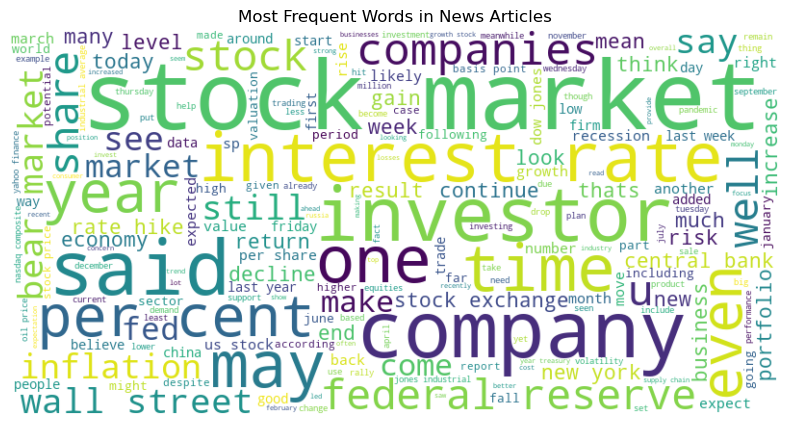

In [12]:
# Generate word cloud for most frequent words in 'cleaned_text'
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df['cleaned_text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in News Articles")

# Save the plot as a transparent PNG with the title as the filename
plot_path = os.path.join("Plots", "Most_Frequent_Words_in_News_Articles.png")
plt.savefig(plot_path, transparent=True, dpi=300)

plt.show()


**Top N Words by Frequency**


*   **Common Words**: Finds the 20 most frequent words in the dataset.
*   **Visualization**: Displays these words and their counts in a bar chart.




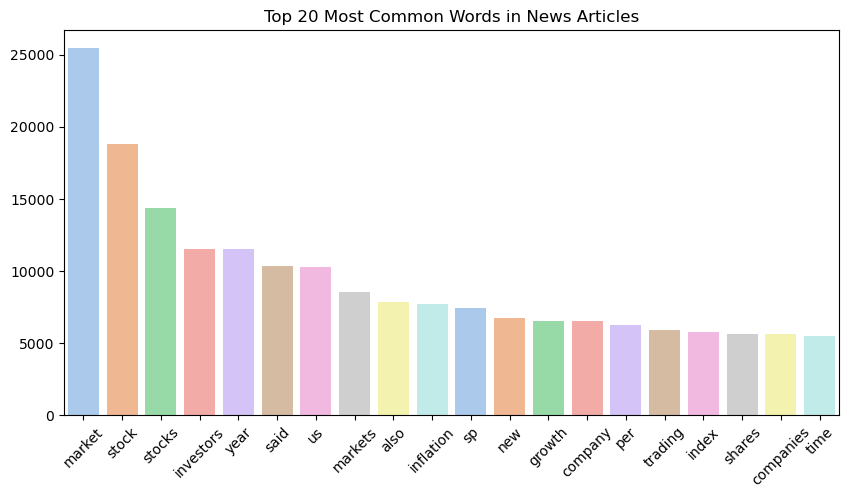

In [13]:
from collections import Counter

# Find top 20 most common words
all_words = " ".join(df['cleaned_text']).split()
word_counts = Counter(all_words)
common_words = word_counts.most_common(20)
words, counts = zip(*common_words)

plt.figure(figsize=(10, 5))
sns.barplot(x=list(words), y=list(counts), palette= 'pastel')
plt.xticks(rotation=45)
plt.title("Top 20 Most Common Words in News Articles")

# Save the plot as a transparent PNG with the title as the filename
plot_path = os.path.join("Plots", "Top_20_Most_Common_Words_in_News_Articles.png")
plt.savefig(plot_path, transparent=True, dpi=300)

plt.show()


**TF-IDF Vectorization**


*   **TF-IDF**: Transforms text data into a matrix of features based on term frequency-inverse document frequency.
*  **Purpose**: Converts text data into numerical features for model input.




In [15]:
# Vectorize text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_text']).toarray()


In [17]:
# Encode target variable (1 for "up", 0 for "down" - modify as necessary)
df['target_encoded'] = df['target'].apply(lambda x: 1 if x == 'up' else 0)
y = df['target_encoded']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Encode Target Variable and Split Data**


*   **Target Encoding**: Converts the target variable to numerical values.
*   **Train-Test Split**: Divides the data into training and testing sets, essential for evaluating model performance.
   



In [18]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [19]:
# Make predictions and evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.5212765957446809

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.58      0.55       476
           1       0.52      0.46      0.49       464

    accuracy                           0.52       940
   macro avg       0.52      0.52      0.52       940
weighted avg       0.52      0.52      0.52       940



### For Pastel cmap

In [20]:
# For Pastel Colors
from matplotlib.colors import LinearSegmentedColormap

pastel_cmap = LinearSegmentedColormap.from_list("pastel", ["#FFB3BA", "#B3CDE3", "#CCEBC5", "#DECBE4"])

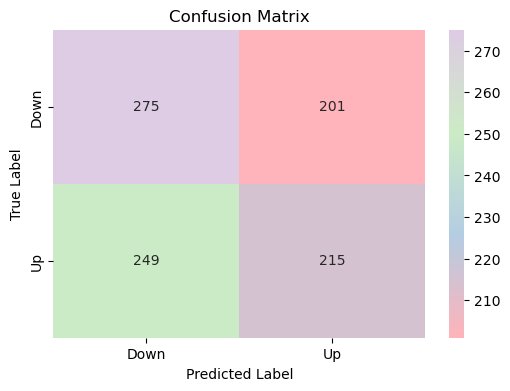

In [21]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap=pastel_cmap, xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


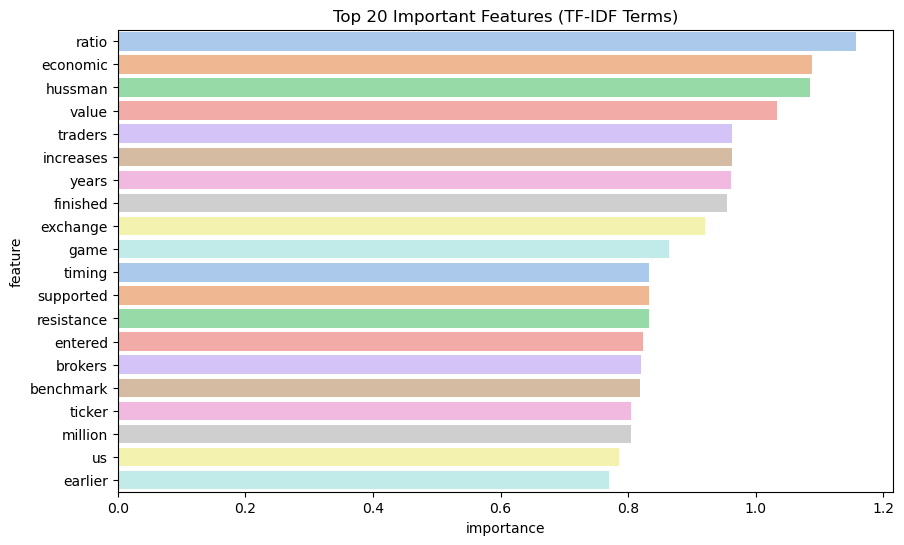

In [22]:
# Feature importance visualization for top TF-IDF terms
importance = model.coef_[0]
feature_names = vectorizer.get_feature_names_out()
feature_importance = pd.DataFrame({'feature': feature_names, 'importance': importance})
feature_importance = feature_importance.sort_values(by='importance', ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance, palette="pastel")
plt.title("Top 20 Important Features (TF-IDF Terms)")

# Save the plot as a transparent PNG with the title as the filename
plot_path = os.path.join("Plots", "Top_20_Important_Features_(TF-IDF_Terms).png")
plt.savefig(plot_path, transparent=True, dpi=300)

plt.show()


**Train Classification Models (Logistic Regression, Naive Bayes, Random Forest)**

Each block here initializes, trains, and evaluates a classification model.



1.   **Model Initialization**: Initializes each model (Logistic Regression, Naive Bayes, Random Forest).
2.  **Model Training**: Fits each model on the training data.
3.  **Prediction**: Makes predictions on the test data.



In [23]:
# Import additional libraries for models
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Vectorize the cleaned text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_text']).toarray()

# Encode target variable (1 for "up", 0 for "down")
df['target_encoded'] = df['target'].apply(lambda x: 1 if x == 'up' else 0)
y = df['target_encoded']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Saving the dataset after adding columns

In [36]:
print("Dataset after cleaning and adding new columns:\n")

print(df.head(5))

# Saving Dataset
df.to_csv("Dataset/Preprocessed_Text_Dataset.csv")

Dataset after cleaning and adding new columns:

   Unnamed: 0        date                                                url  \
0           0  2022-10-08  https://www.livemint.com/market/stock-market-n...   
1           1  2022-10-08  https://www.zawya.com/en/markets/equities/wall...   
2           2  2022-10-08  https://www.goodisonnews.com/2022/10/08/stock-...   
3           3  2022-10-08  https://www.livemint.com/market/stock-market-n...   
4           4  2022-10-08  https://finance.yahoo.com/news/crypto-exchange...   

                                           full_text  \
0  Have you read your account statements for the ...   
1  Wall Street fell sharply on Friday following a...   
2  By Matthew Shaw 8th Oct, 2022 | 8:10am\n\nStoc...   
3  Stock split 2022: The board of directors of An...   
4  (Reuters) - Cryptocurrency exchange Huobi Glob...   

                                             summary  \
0  And it’s natural to avoid looking too closely ...   
1  Nonfarm payrolls ro

In [24]:
# Logistic Regression Model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Predict and evaluate Logistic Regression model
y_pred_logistic = logistic_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression Accuracy:", accuracy_logistic)
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_logistic))


Logistic Regression Accuracy: 0.5212765957446809

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.52      0.58      0.55       476
           1       0.52      0.46      0.49       464

    accuracy                           0.52       940
   macro avg       0.52      0.52      0.52       940
weighted avg       0.52      0.52      0.52       940



In [25]:
# Naive Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predict and evaluate Naive Bayes model
y_pred_nb = nb_model.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)
print("\nClassification Report (Naive Bayes):")
print(classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.5638297872340425

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           0       0.56      0.66      0.61       476
           1       0.57      0.47      0.51       464

    accuracy                           0.56       940
   macro avg       0.57      0.56      0.56       940
weighted avg       0.56      0.56      0.56       940



In [26]:
# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate Random Forest model
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.5191489361702127

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.52      0.61      0.56       476
           1       0.52      0.42      0.46       464

    accuracy                           0.52       940
   macro avg       0.52      0.52      0.51       940
weighted avg       0.52      0.52      0.51       940



**Confusion Matrix Visualization**


1.   **Confusion Matrix**: Shows true positive, false positive, true negative, and false negative counts.
2.   **Purpose**: Helps understand each model’s performance in terms of correctly/incorrectly predicted classes.
   



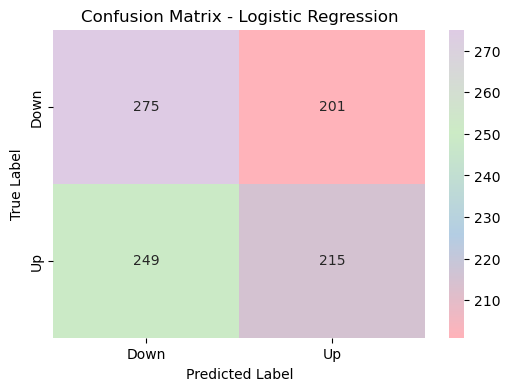

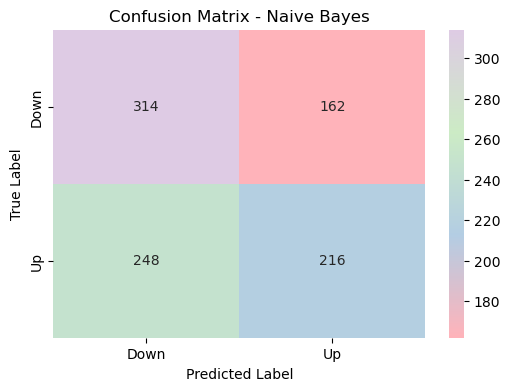

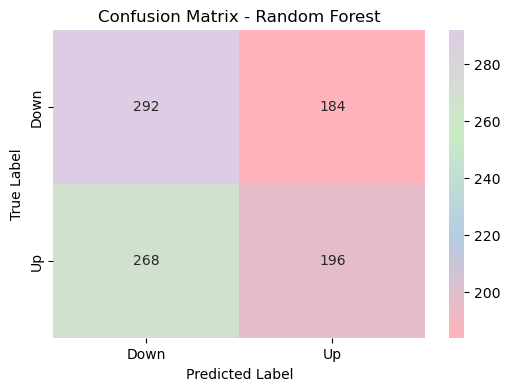

In [27]:
# Function to plot confusion matrix
def plot_confusion_matrix(model_name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap=pastel_cmap, xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Plot confusion matrices for each model
plot_confusion_matrix("Logistic Regression", y_test, y_pred_logistic)
plot_confusion_matrix("Naive Bayes", y_test, y_pred_nb)
plot_confusion_matrix("Random Forest", y_test, y_pred_rf)


**ROC Curve Visualization**



1.   **ROC Curve**: Plots true positive rate vs. false positive rate.
2.   **AUC Score**: Shows how well each model distinguishes between classes.





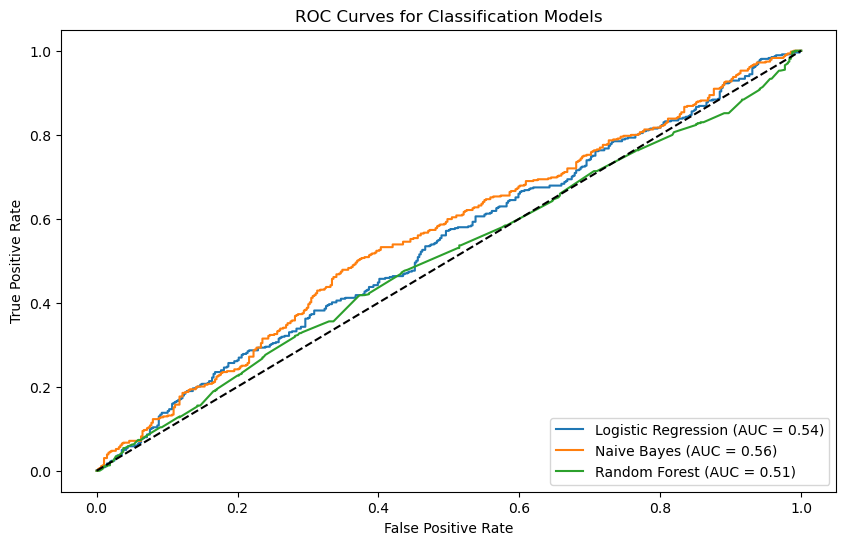

In [28]:
# Calculate ROC AUC and plot ROC curves
plt.figure(figsize=(10, 6))

# Logistic Regression ROC Curve
y_pred_proba_logistic = logistic_model.predict_proba(X_test)[:, 1]
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_proba_logistic)
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {roc_auc_score(y_test, y_pred_proba_logistic):.2f})")

# Naive Bayes ROC Curve
y_pred_proba_nb = nb_model.predict_proba(X_test)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_proba_nb)
plt.plot(fpr_nb, tpr_nb, label=f"Naive Bayes (AUC = {roc_auc_score(y_test, y_pred_proba_nb):.2f})")

# Random Forest ROC Curve
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_score(y_test, y_pred_proba_rf):.2f})")

# Plot formatting
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random performance
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Classification Models")
plt.legend(loc="lower right")

# Save the plot as a transparent PNG with the title as the filename
plot_path = os.path.join("Plots", "ROC_Curves_for_Classification_Models.png")
plt.savefig(plot_path, transparent=True, dpi=300)

plt.show()


**Feature Importance for Random Forest**
1. **Feature Importance**: Shows which words are most influential for the Random Forest model.
2. **Insight**: Useful to understand the words that impact predictions.

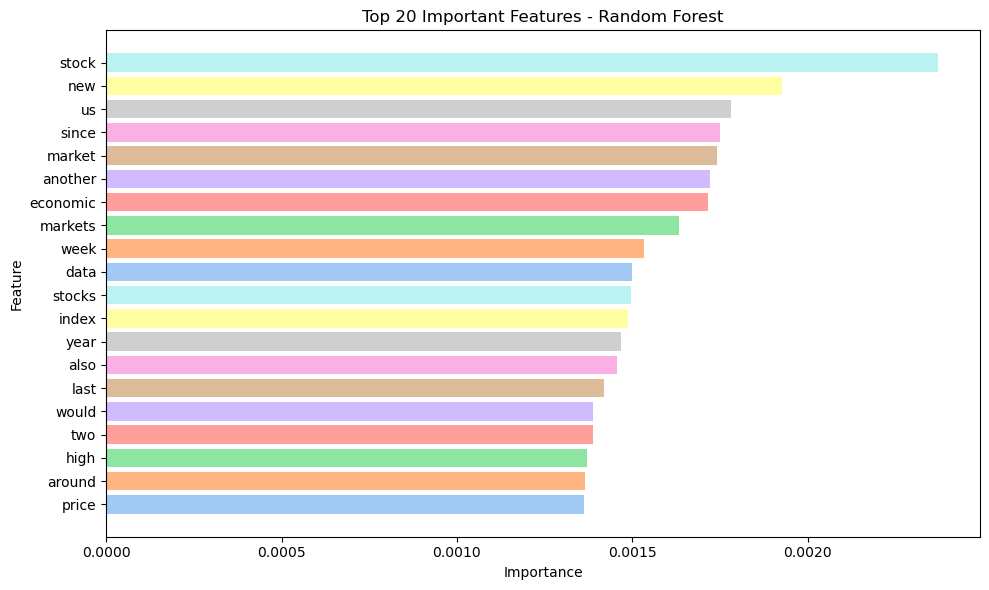

In [29]:
# Get feature importances from the Random Forest model
importances = rf_model.feature_importances_

# Get indices of the top 20 features
indices = np.argsort(importances)[-20:]

# Get feature names of the top 20 features
top_features = vectorizer.get_feature_names_out()[indices]

# Get the top 20 importances
top_importances = importances[indices]

# Use Seaborn's pastel color palette for the bars
colors = sns.color_palette("pastel", len(top_features))

# Plotting the top 20 features with pastel colors
plt.figure(figsize=(10, 6))
plt.barh(top_features, top_importances, color=colors)
plt.title("Top 20 Important Features - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()  # Ensures labels are not cut off

# Save the plot as a transparent PNG with the title as the filename
plot_path = os.path.join("Plots", "Top_20_Important_Features_Random_Forest.png")
plt.savefig(plot_path, transparent=True, dpi=300)

plt.show()

**Generate Summary Table**
1. **Summary Table**: Summarizes accuracy, precision, recall, F1-score, and AUC for each model.
2. **Purpose**: Provides a quick comparison of model performance.

In [28]:
# Define a function to calculate all required metrics for a model
def evaluate_model(name, model, X_test, y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    precision = report["1"]["precision"]
    recall = report["1"]["recall"]
    f1 = report["1"]["f1-score"]
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    return {
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "AUC": auc
    }

# Evaluate each model and store the results
results = []

# Logistic Regression evaluation
results.append(evaluate_model("Logistic Regression", logistic_model, X_test, y_test, y_pred_logistic))

# Naive Bayes evaluation
results.append(evaluate_model("Naive Bayes", nb_model, X_test, y_test, y_pred_nb))

# Random Forest evaluation
results.append(evaluate_model("Random Forest", rf_model, X_test, y_test, y_pred_rf))

# Create a DataFrame for the summary table
summary_table = pd.DataFrame(results)
summary_table


,Model,Accuracy,Precision,Recall,F1-Score,AUC
0,Logistic Regression,0.521277,0.516827,0.463362,0.488636,0.539733
1,Naive Bayes,0.563830,0.571429,0.465517,0.513064,0.559863
2,Random Forest,0.519149,0.515789,0.422414,0.464455,0.508161


### Saving the model for later use

In [34]:
# Save the model to a .pkl file
with open('Models/Classification/Naive_Bayes_Model.pkl', 'wb') as file:
    pickle.dump(nb_model, file)

# Save the model using joblib
joblib.dump(nb_model, 'Models/Classification/Naive_Bayes_Model.joblib')

['Models/Classification/Naive_Bayes_Model.joblib']